Парадокс Симпсона - явление, когда в совокупности, разбитой на группы, внутригрупповые особенности исчезают при объеденении групп. Об этом парадоксе известно давно, и "парадоксом" он является лишь с обывательской точки зрения.

Классический пример - данные о приеме студентов в университет Беркли. 

In [8]:
%matplotlib inline

In [9]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv('berkeley_case.csv', sep = ';')

In [11]:
total = pd.pivot_table(data, aggfunc = sum, index = 'gender', columns = 'param', values = 'number')

In [12]:
total

param,accepted,applied
gender,,
men,1192,2590
women,557,1835


In [13]:
total['accepted']/total['applied']

gender
men      0.460232
women    0.303542
dtype: float64

Нетрудно заметить, что среди мужчин число принятых выше, нежели среди женщин. Можно ли утверждать, что руководство университета отдавало большее предпочтение мужчинам при поступлении?

Последующие операции хорошо описаны в  https://habrahabr.ru/post/279665/ , откуда и был взят код.

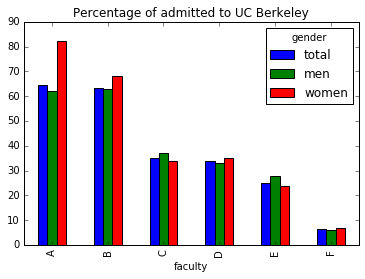

In [14]:
df = pd.pivot_table(data, index = 'faculty', values = 'number', columns = ['gender', 'param'])
df['men']['accepted'] # взять определенную колонку в df
df['men'] # отфильтровать колонки на верхнем уровне (level = 0)
# отфильтровать колонки на втором уровне, только accepted
idx = pd.IndexSlice
df.loc[idx[:], idx[:, 'accepted']]
df_total = (df['men'] + df['women']).T # считаем суммарные показатели и сохраняем как отдельный dataframe
df_total['gender'] = 'total'
df_total.set_index('gender', append = True, inplace = True) # добавляем дополнительный уровень в индекс
df_total = df_total.reorder_levels(['gender', 'param']).T # изменяем порядок уровней в индексе
df = pd.concat([df, df_total], axis = 1) # объединяем с исходным df
df_inv = df.reorder_levels(['param', 'gender'], axis = 1).sort_index(level = 0, axis = 1) # изменим порядок уровней в индексе для удобства расчетов
admitted_perc = (100*df_inv.accepted/df_inv.applied)
admitted_perc[['total', 'men', 'women']].plot(kind = 'bar', title = 'Percentage of admitted to UC Berkeley')

Мы видим, что доля поступивших женщин даже выше, чем мужчин. Гипотеза о дискриминации не подтверждается. В чем же объяснение?

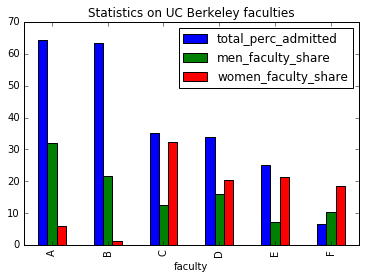

In [15]:
gender_faculty_applications = pd.pivot_table(data[data.param == 'applied'], 
                                             index = 'faculty', values = 'number', columns = 'gender')
gender_faculty_applications = gender_faculty_applications.apply(lambda x: 100*x/gender_faculty_applications.sum(), axis = 1)
gender_faculty_applications.columns += '_faculty_share'
faculty_stats = admitted_perc[['total']].join(gender_faculty_applications)
faculty_stats.columns = ['total_perc_admitted', 'men_faculty_share', 'women_faculty_share']
faculty_stats.plot(kind = 'bar', title = 'Statistics on UC Berkeley faculties')

Оно очень простое - мужчины, в основном, подавали заявления на факультеты с низким проходным баллом, а женщины выбирали более сложные. 